Bayesian Data Description
==============================


In [1]:
import numpy as np
import matplotlib.pylab as plt

from tilitools.bdd import BDD
from tilitools.utils_kernel import get_kernel, get_diag_kernel

%matplotlib inline

In [8]:
kparam = 0.1
ktype = 'rbf'

# generate raw training data
Dtrain1 = np.random.randn(2, 100)*0.2
Dtrain2 = np.random.randn(2, 100)*0.3 + 0.8
Dtrain = np.concatenate([Dtrain1.T, Dtrain2.T]).T
print Dtrain.shape
kernel = get_kernel(Dtrain, Dtrain, ktype, kparam)
bdd = BDD(kernel)
bdd.fit()

(2, 200)
Calculating Gaussian kernel with size 200x200 and sigma2=0.1.
Creating new SVDD with 200 samples.


(2, 6400)
Calculating Gaussian kernel with size 6400x200 and sigma2=0.1.


Gaussian kernel diagonal is always exp(0)=1.


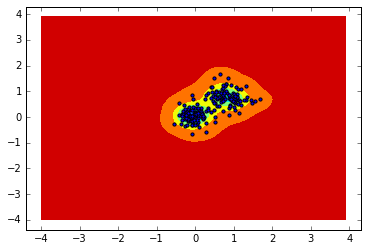

In [9]:
# generate test data grid
delta = 0.1
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
sx, sy = X.shape
Xf = np.reshape(X, (1, sx*sy))
Yf = np.reshape(Y, (1, sx*sy))
Dtest = np.append(Xf, Yf, axis=0)
print Dtest.shape

# build kernel map
kernel_map = get_kernel(Dtest, Dtrain, ktype, kparam)
norms = get_diag_kernel(Dtest, ktype, kparam)
scores, mat = bdd.apply(Dtest, kernel_map, norms)
Z = np.reshape(scores,(sx,sy))
plt.contourf(X, Y, Z)
plt.scatter(Dtrain[0,:],Dtrain[1,:],10)
plt.show()